<img src='images/cin-logo.png' style='width:600px;'>

# IF997- TÓPICOS AVANÇADOS EM SI 1
## Projeto Incognia

### Grupo: Alisson Diego, Guilherme Santiago, Pedro Sena

## Base de Dados

| coluna                               | tipo   | descrição                                                                                     |
|--------------------------------------|--------|-----------------------------------------------------------------------------------------------|
| id                                   | string | identificador do login                                                                        |
| account_id                           | string | identificador da conta                                                                        |
| device_id                            | string | identificador do dispositivo                                                                  |
| installation_id                      | string | identificador da instalação                                                                   |
| timestamp                            | long   | timestamp (unixtime - em ms)                                                                  |
| is_from_official_store               | bool   | se o app utilizado foi instalado através de uma loja oficial                                  |
| is_emulator                          | bool   | uso de emulador                                                                               |
| has_fake_location_app                | bool   | se o dispositivo possui aplicação de geração localizações falsas                              |
| has_fake_location_enable             | bool   | se o dispositivo habilitou geração de localizações falsas                                     |
| probable_root                        | bool   | provável root do sistema                                                                      |
| device_age_ms                        | long   | idade do dispositivo (em ms)                                                                  |
| max_installations_on_related_devices | int    | quantidade máxima de instalações dos dispositivos associados à conta                          |
| never_permited_location_on_account   | bool   | se o dispositivo nunca habilitou coleta de localizações, quando outros dispositivos o fizeram |
| boot_count                           | int    | quantidade de reinicializações do dispositivo                                                 |
| wallpaper_count                      | int    | quantidade de wallpapers do dispositivo                                                       |
| n_accounts                           | int    | número de contas acessadas pelo dispositivo                                                   |
| ato                                  | bool   | se login está associado a um evento de account takeover                                       |

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plotlib
%matplotlib inline

In [90]:
dataframe_logins = pd.read_parquet('./dataset/logins.parquet4')
dataframe_logins.head()

# contas = len(dataframe_logins['account_id'].unique())
# dispostivos = len(dataframe_logins['device_id'].unique())
# tentativas_ato = dataframe_logins[dataframe_logins['ato'] == 1].sum()
# max_instalacoes = dataframe_logins['max_installations_on_related_devices'].max()

# print ('Contas:', contas)
# print('Dispositivos:', dispostivos)
# print('Tentativas de ATO:', int(tentativas_ato['ato']))
# print('Máximo de instalações em um dispositivo:', max_instalacoes)

# dataframe_logins.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1.621290e+12,1.0,0.0,0.0,0.0,0.0,1.407468e+09,1.0,0.0,129.0,28.0,1.0,0.0
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1.620309e+12,1.0,0.0,0.0,0.0,0.0,1.622747e+10,2.0,0.0,131.0,224.0,1.0,0.0
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.625228e+12,1.0,0.0,0.0,0.0,0.0,2.865500e+10,2.0,0.0,179.0,6.0,1.0,0.0
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1.624645e+12,1.0,0.0,0.0,0.0,0.0,2.484419e+10,3.0,0.0,38.0,11.0,1.0,0.0
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.619907e+12,1.0,0.0,0.0,0.0,0.0,2.334158e+10,2.0,0.0,NaN,NaN,1.0,0.0


### Remover IDs nulos

In [91]:
null_ids = np.where(dataframe_logins[['id', 'account_id', 'device_id', 'installation_id']].isnull())

lista_id = []
for id in null_ids[0]:
  if id not in lista_id:
    lista_id.append(id)

dataframe_logins.drop(inplace=True, index=lista_id)

### Preencher valores nulos

In [92]:
moda_timestamp = dataframe_logins['timestamp'].mode()[0]
moda_device_age = dataframe_logins['device_age_ms'].mode()[0]
colunas = [
  'wallpaper_count', 
  'boot_count', 
  'never_permitted_location_on_account', 
  'max_installations_on_related_devices', 
  'is_from_official_store', 
  'is_emulator', 
  'has_fake_location_app', 
  'has_fake_location_enabled', 
  'probable_root', 
  'max_installations_on_related_devices', 
  'n_accounts'
]

dataframe_logins['timestamp'] = dataframe_logins['timestamp'].fillna(moda_timestamp)
dataframe_logins['device_age_ms'] = dataframe_logins['device_age_ms'].fillna(moda_device_age)

dataframe_logins[colunas].fillna(0)
# dataframe_logins['boot_count'] = dataframe_logins['boot_count'].fillna(0)
# dataframe_logins['never_permitted_location_on_account'] = dataframe_logins['never_permitted_location_on_account'].fillna(0)
# dataframe_logins['max_installations_on_related_devices'] = dataframe_logins['max_installations_on_related_devices'].fillna(0)
# dataframe_logins['is_from_official_store'] = dataframe_logins['is_from_official_store'].fillna(0)
# dataframe_logins['is_emulator'] = dataframe_logins['is_emulator'].fillna(0)
# dataframe_logins['has_fake_location_app'] = dataframe_logins['has_fake_location_app'].fillna(0)
# dataframe_logins['has_fake_location_enabled'] = dataframe_logins['max_installations_on_related_devices'].fillna(0)
# dataframe_logins['probable_root'] = dataframe_logins['max_installations_on_related_devices'].fillna(0)
# dataframe_logins['max_installations_on_related_devices'] = dataframe_logins['max_installations_on_related_devices'].fillna(0)

dataframe_logins.isna().sum()

id                                            0
account_id                                    0
device_id                                     0
installation_id                               0
timestamp                                     0
is_from_official_store                        3
is_emulator                                   4
has_fake_location_app                         1
has_fake_location_enabled                     6
probable_root                                 2
device_age_ms                                 0
max_installations_on_related_devices          1
never_permitted_location_on_account           2
boot_count                              2027779
wallpaper_count                         2027808
n_accounts                               256685
ato                                           0
dtype: int64

In [6]:
#new_dataframe = dataframe.drop('Unnamed: 0', axis=1)

#int_columns = ['is_from_official_store', 'is_emulator', 'has_fake_location_app',
 #      'has_fake_location_enabled', 'probable_root',
  #     'max_installations_on_related_devices',
   #    'never_permitted_location_on_account', 'boot_count', 'wallpaper_count',
    #   'n_accounts', 'ato']

#new_dataframe[int_columns] = new_dataframe[int_columns].fillna(0).astype('int64')

#device_age_mean = new_dataframe['device_age_ms'].mean()
#new_dataframe['device_age_ms'].fillna(device_age_mean, inplace=True)

#timestamp_mode = new_dataframe['timestamp'].mode()[0]
#new_dataframe['timestamp'].fillna(timestamp_mode, inplace=True)

In [8]:
import time
def limparBd (df):
    print("Tamanho inicial: " + str(len(df)))
    inicio = time.time()
    colunas = df.columns
    cont = 0
    indices = []
    dados = df.to_numpy()
    
    for linha in dados:
        if not linhaCorreta(linha):
            indices.append(cont)
        cont += 1
    dados = np.delete(dados, indices, axis=0)
    df = pd.DataFrame(dados, columns=colunas)
    print("Qtd linhas inválidas: " + str(len(indices)))
    print("Tamanho final: " + str(len(df)))    
    print("Demorou: " + str(time.time() - inicio) + " segundos")
    df.to_parquet("teste.parquet4")
    return df

def stringValida(valores):
    for valor in valores:
        if valor == "" or valor == None:
            return False
    return True

def booleanValido(valores):
    for valor in valores:
        if valor != 1 and valor != 0:
            return False
    return True

def linhaCorreta(linha):
    verificarStrings = [linha[0], linha[1], linha[2], linha[3]]
    if not stringValida(verificarStrings):
        return False
    
    timestamp = linha[4]
    if timestamp is None or timestamp == np.nan or type(timestamp) != float:  
        return False
    
    verificarBoolean = [linha[5], linha[6], linha[7], linha[8], linha[9], linha[12], linha[16]]
    if not booleanValido(verificarBoolean):
        return False
    
    return True

def mudarParaBooleano(x):
    if (x == 1):
        return True
    return False

#null_ids_list = np.where(new_dataframe['id'].isnull())
#for id in null_ids_list:
  #new_dataframe = new_dataframe.drop(id)
#print(len(new_dataframe))
# ids_list = np.where(new_dataframe['installation_id'].isnull())
# for id in ids_list:
#   new_dataframe = new_dataframe.drop(id)

# for id in np.where(new_dataframe['account_id '].isnull()):
#   new_dataframe = new_dataframe.drop(id)

In [9]:
new_dataframe = limparBd(new_dataframe)

new_dataframe['timestamp'] = new_dataframe['timestamp'].fillna(0)
new_dataframe['wallpaper_count'] = new_dataframe['wallpaper_count'].fillna(0)
new_dataframe['boot_count'] = new_dataframe['boot_count'].fillna(0)
new_dataframe['device_age_ms'] = new_dataframe['device_age_ms'].fillna(0)

new_dataframe['ato'] = new_dataframe['ato'].apply(mudarParaBooleano)
new_dataframe['never_permitted_location_on_account'] = new_dataframe['never_permitted_location_on_account'].apply(mudarParaBooleano)
new_dataframe['probable_root'] = new_dataframe['probable_root'].apply(mudarParaBooleano)
new_dataframe['has_fake_location_enabled'] = new_dataframe['has_fake_location_enabled'].apply(mudarParaBooleano)
new_dataframe['has_fake_location_app'] = new_dataframe['has_fake_location_app'].apply(mudarParaBooleano)
new_dataframe['is_emulator'] = new_dataframe['is_emulator'].apply(mudarParaBooleano)
new_dataframe['is_from_official_store'] = new_dataframe['is_from_official_store'].apply(mudarParaBooleano)

new_dataframe.head()



Tamanho inicial: 5418786
Qtd linhas inválidas: 329
Tamanho final: 5418457
Demorou: 32.86438298225403 segundos


,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1.621290e+12,True,False,False,False,False,1.407468e+09,1.0,False,129.0,28.0,1.0,False
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1.620309e+12,True,False,False,False,False,1.622747e+10,2.0,False,131.0,224.0,1.0,False
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.625228e+12,True,False,False,False,False,2.865500e+10,2.0,False,179.0,6.0,1.0,False
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1.624645e+12,True,False,False,False,False,2.484419e+10,3.0,False,38.0,11.0,1.0,False
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1.619907e+12,True,False,False,False,False,2.334158e+10,2.0,False,0.0,0.0,1.0,False


In [10]:
from datetime import datetime
def adicionaData(df):
    colunas = df.columns
    dados = df.to_numpy()
    datas = []
    for linha in dados:        
        timestamp = linha[4]/1000                
        dataHora = datetime.fromtimestamp(timestamp)          
        datas.append(dataHora)        
    df = pd.DataFrame(dados, columns=colunas) 
    df["date_time"] = datas 
    return df

In [11]:
new_dataframe = adicionaData(new_dataframe)
new_dataframe.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato,date_time
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1621290337164.0,True,False,False,False,False,1407468166.0,1.0,False,129.0,28.0,1.0,False,2021-05-17 19:25:37.164
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1620308937125.0,True,False,False,False,False,16227470008.0,2.0,False,131.0,224.0,1.0,False,2021-05-06 10:48:57.125
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1625227899844.0,True,False,False,False,False,28655003974.0,2.0,False,179.0,6.0,1.0,False,2021-07-02 09:11:39.844
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1624645467436.0,True,False,False,False,False,24844192781.0,3.0,False,38.0,11.0,1.0,False,2021-06-25 15:24:27.436
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1619906524663.0,True,False,False,False,False,23341583032.0,2.0,False,0.0,0.0,1.0,False,2021-05-01 19:02:04.663


In [12]:
def adicionaColunaContas(df):
    colunas = df.columns
    dados = df.to_numpy()
    colunaContas = []
    for linha in dados:        
        maisDeUmaConta = linha[15] > 1         
        colunaContas.append(maisDeUmaConta)        
    df = pd.DataFrame(dados, columns=colunas) 
    df["has_many_accounts_on_device"] = colunaContas 
    return df

In [13]:
new_dataframe = adicionaColunaContas(new_dataframe)
new_dataframe.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato,date_time,has_many_accounts_on_device
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1621290337164.0,True,False,False,False,False,1407468166.0,1.0,False,129.0,28.0,1.0,False,2021-05-17 19:25:37.164,False
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1620308937125.0,True,False,False,False,False,16227470008.0,2.0,False,131.0,224.0,1.0,False,2021-05-06 10:48:57.125,False
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1625227899844.0,True,False,False,False,False,28655003974.0,2.0,False,179.0,6.0,1.0,False,2021-07-02 09:11:39.844,False
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1624645467436.0,True,False,False,False,False,24844192781.0,3.0,False,38.0,11.0,1.0,False,2021-06-25 15:24:27.436,False
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1619906524663.0,True,False,False,False,False,23341583032.0,2.0,False,0.0,0.0,1.0,False,2021-05-01 19:02:04.663,False


In [14]:
def adicionaColunaAcessoVariosDispositivos(df):
    colunas = df.columns
    dados = df.to_numpy()
    colunaAcessos = np.ones(len(df), dtype=bool)
    quantidadeAcessos = {}
    cont = 0
    
    for linha in dados:        
        account_id = linha[1]
        device_id = linha[2]
        if account_id not in quantidadeAcessos:
            quantidadeAcessos[account_id] = [device_id, 1, []]
        elif device_id != quantidadeAcessos[account_id][0]:
            quantidadeAcessos[account_id][1] += 1
        quantidadeAcessos[account_id][2].append(cont)
        cont += 1
        
    for acc in quantidadeAcessos:
        if quantidadeAcessos[acc][1] > 1:
            for i in quantidadeAcessos[acc][2]:
                colunaAcessos[i] = True
        else:
            for i in quantidadeAcessos[acc][2]:
                colunaAcessos[i] = False            
            
    df = pd.DataFrame(dados, columns=colunas) 
    df["has_access_on_different_devices"] = colunaAcessos 
    return df

In [15]:
new_dataframe = adicionaColunaAcessoVariosDispositivos(new_dataframe)
new_dataframe.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,device_age_ms,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato,date_time,has_many_accounts_on_device,has_access_on_different_devices
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1621290337164.0,True,False,False,False,False,1407468166.0,1.0,False,129.0,28.0,1.0,False,2021-05-17 19:25:37.164,False,False
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1620308937125.0,True,False,False,False,False,16227470008.0,2.0,False,131.0,224.0,1.0,False,2021-05-06 10:48:57.125,False,False
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1625227899844.0,True,False,False,False,False,28655003974.0,2.0,False,179.0,6.0,1.0,False,2021-07-02 09:11:39.844,False,False
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1624645467436.0,True,False,False,False,False,24844192781.0,3.0,False,38.0,11.0,1.0,False,2021-06-25 15:24:27.436,False,False
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1619906524663.0,True,False,False,False,False,23341583032.0,2.0,False,0.0,0.0,1.0,False,2021-05-01 19:02:04.663,False,False


In [16]:
def adicionaColunaAtoComRoot(df):
    colunas = df.columns
    dados = df.to_numpy()
    colunaAtoRoot = np.ones(len(df), dtype=bool)
    cont = 0
    
    for linha in dados:        
        root = linha[9]
        ato = linha[2]
        if root and ato:
            colunaAtoRoot[cont] = True          
        else:
            colunaAtoRoot[cont] = False
        cont+=1
            
    df = pd.DataFrame(dados, columns=colunas) 
    df["has_ato_and_probable_root"] = colunaAtoRoot 
    return df

In [17]:
new_dataframe = adicionaColunaAtoComRoot(new_dataframe)
new_dataframe.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,...,max_installations_on_related_devices,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato,date_time,has_many_accounts_on_device,has_access_on_different_devices,has_ato_and_probable_root
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1621290337164.0,True,False,False,False,False,...,1.0,False,129.0,28.0,1.0,False,2021-05-17 19:25:37.164,False,False,False
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1620308937125.0,True,False,False,False,False,...,2.0,False,131.0,224.0,1.0,False,2021-05-06 10:48:57.125,False,False,False
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1625227899844.0,True,False,False,False,False,...,2.0,False,179.0,6.0,1.0,False,2021-07-02 09:11:39.844,False,False,False
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1624645467436.0,True,False,False,False,False,...,3.0,False,38.0,11.0,1.0,False,2021-06-25 15:24:27.436,False,False,False
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1619906524663.0,True,False,False,False,False,...,2.0,False,0.0,0.0,1.0,False,2021-05-01 19:02:04.663,False,False,False


In [18]:
def adicionaColunaAtoComAcessoEmVariosDispositivos(df):
    colunas = df.columns
    dados = df.to_numpy()
    colunaAtoAcessos = np.ones(len(df), dtype=bool)
    cont = 0
    
    for linha in dados:        
        root = linha[9]
        ato = linha[16]
        if root and ato:
            colunaAtoAcessos[cont] = True          
        else:
            colunaAtoAcessos[cont] = False
        cont+=1
            
    df = pd.DataFrame(dados, columns=colunas) 
    df["has_ato_and_access_on_different_devices"] = colunaAtoAcessos 
    return df

In [19]:
new_dataframe = adicionaColunaAtoComAcessoEmVariosDispositivos(new_dataframe)
new_dataframe.head()

,id,account_id,device_id,installation_id,timestamp,is_from_official_store,is_emulator,has_fake_location_app,has_fake_location_enabled,probable_root,...,never_permitted_location_on_account,boot_count,wallpaper_count,n_accounts,ato,date_time,has_many_accounts_on_device,has_access_on_different_devices,has_ato_and_probable_root,has_ato_and_access_on_different_devices
0,799740346458,YgXAhVgdDLsozwto,fGb574abkmDJTQ6M,Uv9PEQZEwsW8nLOj,1621290337164.0,True,False,False,False,False,...,False,129.0,28.0,1.0,False,2021-05-17 19:25:37.164,False,False,False,False
1,799740346459,bO+gPxgfZG9sXtCb,Xll03k9l/OL2r6LM,pR7skP90RuM3oqhK,1620308937125.0,True,False,False,False,False,...,False,131.0,224.0,1.0,False,2021-05-06 10:48:57.125,False,False,False,False
2,799740346460,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1625227899844.0,True,False,False,False,False,...,False,179.0,6.0,1.0,False,2021-07-02 09:11:39.844,False,False,False,False
3,799740346461,tghz/Mlz069esl03,5fqsAP5QUp1M3PLC,krWwUuXbmBEP9g38,1624645467436.0,True,False,False,False,False,...,False,38.0,11.0,1.0,False,2021-06-25 15:24:27.436,False,False,False,False
4,799740346462,9mEBGcdz+RLzRNB4,qoKjqPhxqyALMsQ5,hzKrODiR6F0jG4rH,1619906524663.0,True,False,False,False,False,...,False,0.0,0.0,1.0,False,2021-05-01 19:02:04.663,False,False,False,False


In [20]:
new_dataframe.to_parquet("./dataset/resultado.parquet4")

Text(0.5, 1.0, 'Idade dos dispositivos')

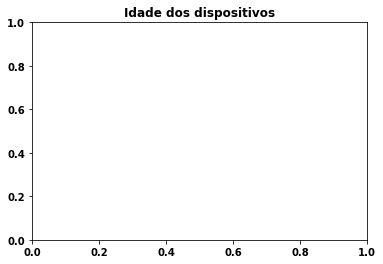

In [78]:
import matplotlib.pyplot as plotlib

#Gráfico de idades de dispositivos
def transformaParaAno(valor):
    if valor < 31540000000:
        return 1
    else:
        return 2

def pegarQuantidadeOcorrencias(lista, valor):
    cont = 0
    for i in lista:
        if i == valor:
            cont += 1
    return cont

#Relação entre ATO e acesso em vários dispositivos
def relacaoAtoVariosAcessos(df):
    dados = df.to_numpy()
    possuiRelacao = 0
    naoPossuiRelacao = 0
    contasUnicas = {}
    
    for linha in dados:
        if linha[1] not in contasUnicas:
            contasUnicas[linha[1]] = None  
            variosAcessos = linha[19]
            ato = linha[16]
            if variosAcessos and ato:
                possuiRelacao += 1        
            else:
                naoPossuiRelacao += 1
                
    return [possuiRelacao, naoPossuiRelacao]
  
COLOR = 'black'
WEIGHT = "bold"
plotlib.rcParams['text.color'] = COLOR
plotlib.rcParams['axes.labelcolor'] = "black"
plotlib.rcParams['xtick.color'] = COLOR
plotlib.rcParams['ytick.color'] = COLOR
plotlib.rcParams['font.weight'] = WEIGHT
plotlib.rcParams['axes.titleweight'] = WEIGHT
plotlib.title("Idade dos dispositivos")

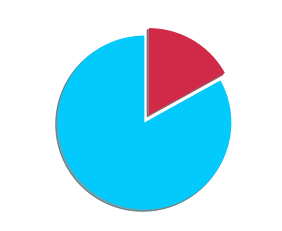

In [22]:
#Gráfico de idades de dispositivos
colunasIdadesValores = new_dataframe['device_age_ms'].apply(transformaParaAno)
valoresIdades = [pegarQuantidadeOcorrencias(colunasIdadesValores, 1), pegarQuantidadeOcorrencias(colunasIdadesValores, 2)]
colunasIdades = ['Menos de 1 ano', 'Mais de 1 ano']
cores = ["#03cafc", "#d12a48"]

plotlib.pie(valoresIdades, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0])
plotlib.show()

338
321132


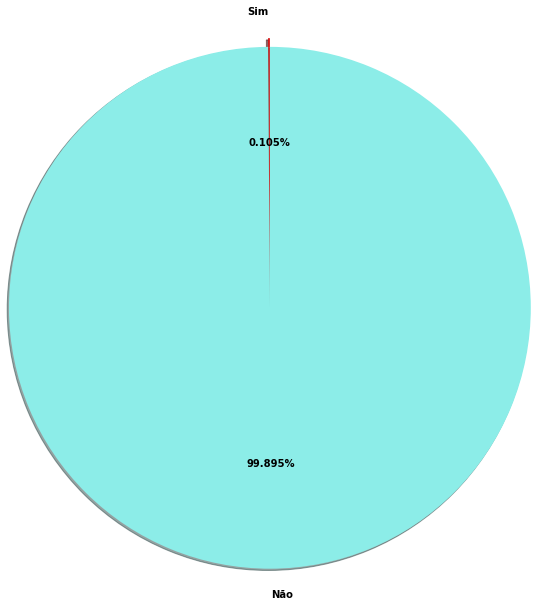

In [89]:
#1. Tem alguma relação entre a conta estar associada a ato e ela ser acessada por mais de um dispositivo diferente?

valoresAtoComVariosAcessos = relacaoAtoVariosAcessos(new_dataframe)
colunasIdades = ['Sim', 'Não']
cores = ["#d60404", "#8cede8"]
print(valoresAtoComVariosAcessos[0])
print(valoresAtoComVariosAcessos[1])

plotlib.pie(valoresAtoComVariosAcessos, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
plotlib.show()

986
320484


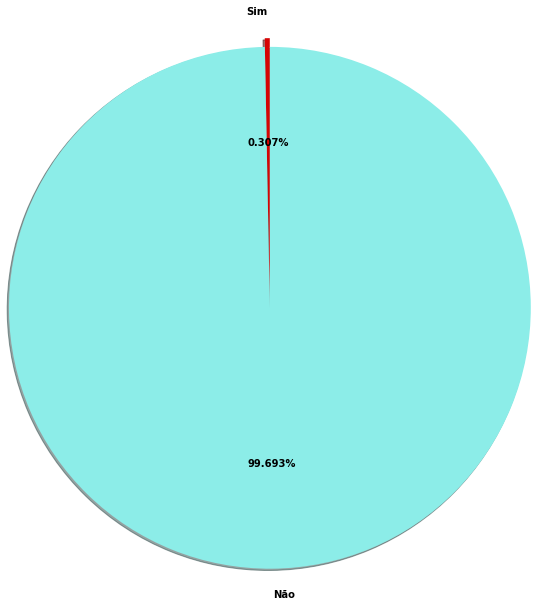

In [90]:
#Coluna ATO
colunasATO = ['Sim', 'Não']
valoresAto = new_dataframe[['account_id', 'ato']].drop_duplicates(subset='account_id')
sim = valoresAto['ato']

sim = sim[valoresAto['ato'] == True].sum()
print(sim)
nao = valoresAto['ato'].shape[0] - int(sim)
print(nao)
cores = ["#d60404", "#8cede8"]

plotlib.pie([sim, nao], labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
#plotlib.pie(valoresAtoComVariosAcessos, labels=colunasIdades, colors=cores, shadow=True, startangle=90, explode=[0.1,0], autopct='%1.3f%%', radius=3)
plotlib.show()